Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the Kaggle competition description page.

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

* Question or problem definition.
* Acquire training and testing data.
* Wrangle, prepare, cleanse the data.
* Analyze, identify patterns, and explore the data.
* Model, predict and solve the problem.
* Visualize, report, and present the problem solving steps and final solution.
* Supply or submit the results.

In [2]:
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
combine = [train_df,test_df]
train_df.info()
print('_'*40)
test_df.info()
train_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


* **Categorical:** Survived, Sex, and Embarked. Ordinal: Pclass.
* **Continous:** Age, Fare. Discrete: SibSp, Parch.
* Seven features are integer or floats. Six in case of test dataset.
* Five features are strings (object).

In [4]:
#Check Missing values
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*40)
print('Test columns with null values:\n', test_df.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


* **Train columns with null values:** Cabin > Age > Embarked 
* **Test columns with null values:** Cabin > Age > Fare


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The distribution of numerical feature values across the samples:**
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* The sample sruvival rate is around 38%.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [6]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Master. Urho Abraham",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


**The distribution of categorical features:**
* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Ticket feature has high ratio (22%) of duplicate values (unique=681).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.(147/204)
* Embarked takes three possible values. S port used by most passengers (top=S)


Next, we consider and explore several assumption factors.

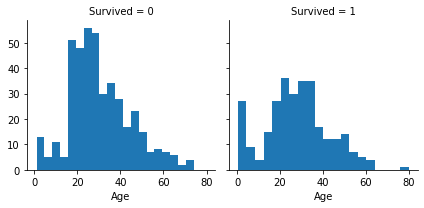

In [7]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

* Most passengers are in 15-35 age range
* Large number of passengers in age range(15-30) didn't survive.
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.

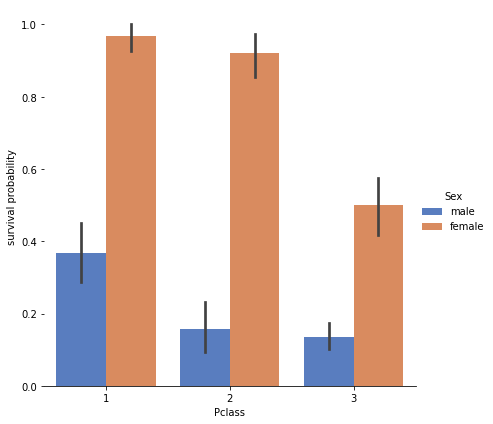

In [8]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

* In all classes, most survived passenegers are female.
* The survival rate of female is much higher than males'.
* The survival rate decreased from class 1 to class 3.

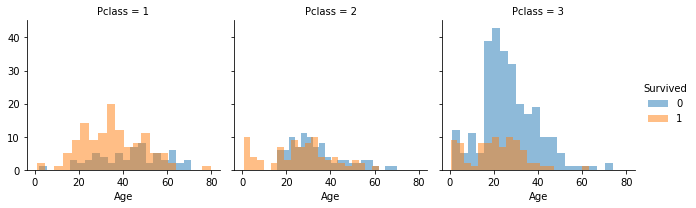

In [9]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

* Pclass=3 had most passengers, however most did not survive..
* Most passengers in Pclass=1 survived.

# Data Processing and Exploration

missing data, new features, converting.

In [10]:
# Impute missing data; Drop columns.
for dataset in combine:    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
drop_column = ['PassengerId','Cabin', 'Ticket']
train_df.drop(drop_column, axis=1, inplace = True)
test_id=test_df['PassengerId']
test_df.drop(drop_column, axis=1, inplace = True)
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*40)
print('Test columns with null values:\n', test_df.isnull().sum())

Train columns with null values:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------------------------------------
Test columns with null values:
 Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Analyze by pivoting features**

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.

In [11]:
for x in train_df.columns[1:9]:
    if train_df[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(train_df[[x,"Survived"]].groupby(x, as_index=False).mean().sort_values(by='Survived', ascending=False))
        print('-'*40)

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------
Survival Correlation by: Name
                                                  Name  Survived
559                             Moss, Mr. Albert Johan         1
472                       Lemore, Mrs. (Amelia Milley)         1
259                         Fortune, Miss. Mabel Helen         1
258                     Fortune, Miss. Alice Elizabeth         1
742                      Silven, Miss. Lyyli Karoliina         1
743                   Silverthorne, Mr. Spencer Victor         1
745          Silvey, Mrs. William Baird (Alice Munger)         1
461                                LeRoy, Miss. Bertha         1
252                                    Foo, Mr. Choong         1
251                   Flynn, Mr. John Irwin ("Irving")         1
747                Simonius-Blumer, Col. Oberst Alfons         1
748                              Sink

* **Pclass : ** We observe significant correlation (>0.5) among Pclass=1 and Survived.We decide to include this feature in our model.
* **Name : ** Name values were mixed texture, we can extract new feature "Title" based on this.
* **Sex : ** Sex=female had very high survival rate at 74%.
* **SibSp and Parch : ** These features had zero correlation for certain values. We can derive features from these individual features.
* **Embarked : ** Embarked=C had higher survival rate at 55%.


In [12]:
#Name --> Title
#extract these.count less than 10 with title = "Rare"
for dataset in combine:  
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    title_names = (dataset['Title'].value_counts() < 10)
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Rare' if title_names.loc[x] == True else x)
    dataset.drop(['Name'], axis=1, inplace = True)

print('Train Count of Titles:\n',train_df['Title'].value_counts())
print('-'*40)
print('Test Count of Titles:\n',test_df['Title'].value_counts())
print('-'*40)
print('Train title with null values:\n', train_df["Title"].isnull().sum())
print("-"*40)
print('Test title with null values:\n', test_df["Title"].isnull().sum())
print("-"*40)
print(train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

Train Count of Titles:
 Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64
----------------------------------------
Test Count of Titles:
 Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: Title, dtype: int64
----------------------------------------
Train title with null values:
 0
----------------------------------------
Test title with null values:
 0
----------------------------------------
    Title  Survived
0  Master  0.575000
1    Miss  0.697802
2      Mr  0.156673
3     Mrs  0.792000
4    Rare  0.444444


In [13]:
#Create new feature (Family Size/ IsAlone) combining existing features (SibSp/ Parch) 
for dataset in combine:
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1   #Discrete variables
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
    drop_column = ['SibSp','Parch','FamilySize']
    dataset.drop(drop_column, axis=1, inplace = True)

/Users/balloon_n/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
# Create Fare and Age bands (reduce the effects of minor observation errors.)
for dataset in combine:
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
print(train_df[['FareBin', 'Survived']].groupby(['FareBin'], as_index=False).mean().sort_values(by='FareBin', ascending=True))
print("-"*40)
print(train_df[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='AgeBin', ascending=True))

           FareBin  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081
----------------------------------------
          AgeBin  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [15]:
# Replace Fare and Age with ordinals based on these bands.
for dataset in combine:    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
 #--------------------------------------------------------------------------------------   
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
 #--------------------------------------------------------------------------------------      
    drop_column = ['FareBin','AgeBin']
    dataset.drop(drop_column, axis=1, inplace = True)

train_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
833,0,3,male,1,0,S,Mr,1
485,0,3,female,1,2,S,Miss,0
460,1,1,male,2,2,S,Mr,1
696,0,3,male,2,1,S,Mr,1
403,0,3,male,1,2,S,Mr,0
323,1,2,female,1,2,S,Mrs,0
854,0,2,female,2,2,S,Mrs,0
536,0,1,male,2,2,S,Rare,1
73,0,3,male,1,2,C,Mr,0
369,1,1,female,1,3,C,Rare,1


In [16]:
#Convert the categorical values (Title/ Sex/ Embarked) to ordinal.
#That categorical data is defined as variables with a finite set of label values. 
#That most machine learning algorithms require numerical input and output variables. 
#That an integer and one hot encoding is used to convert categorical data to integer data.
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
388,0,3,0,1,0,2,1,1
553,1,3,0,1,0,1,1,1
186,1,3,1,1,2,2,3,0
732,0,2,0,1,0,0,1,1
637,0,2,0,1,2,0,1,0
602,0,1,0,1,3,0,1,1
609,1,1,1,2,3,0,2,1
19,1,3,1,1,0,1,3,1
878,0,3,0,1,0,0,1,1
164,0,3,0,0,3,0,4,0


In [17]:
# Correlation
for x in train_df.columns[1:8]:
    if train_df[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(train_df[[x,"Survived"]].groupby(x, as_index=False).mean().sort_values(by='Survived', ascending=False))
        print('-'*40)

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------
Survival Correlation by: Sex
   Sex  Survived
1    1  0.742038
0    0  0.188908
----------------------------------------
Survival Correlation by: Age
   Age  Survived
0    0  0.550000
3    3  0.434783
2    2  0.404255
1    1  0.344168
4    4  0.090909
----------------------------------------
Survival Correlation by: Fare
   Fare  Survived
3     3  0.581081
2     2  0.445415
1     1  0.308756
0     0  0.197309
----------------------------------------
Survival Correlation by: Embarked
   Embarked  Survived
1         1  0.553571
2         2  0.389610
0         0  0.339009
----------------------------------------
Survival Correlation by: Title
   Title  Survived
2      3  0.792000
1      2  0.697802
3      4  0.575000
4      5  0.444444
0      1  0.156673
----------------------------------------
Survival Correlation by: IsAlone
   IsAlone 

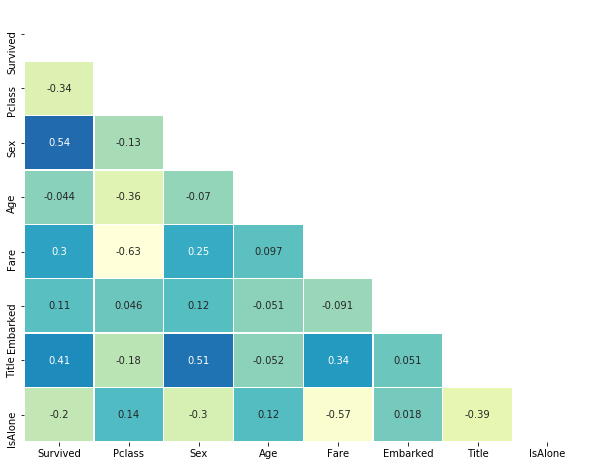

In [18]:
#Positive coefficients increase the log-odds of the response (and thus increase the probability).
#Negative coefficients decrease the log-odds of the response (and thus decrease the probability).
correlation = train_df.corr()
plt.figure(figsize=(10,8))
mask = np.zeros_like(correlation)#https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation,linewidths=.3,annot=True,mask=mask,cmap="YlGnBu",cbar=False)

* Sex had highest correlation with Survived.
* Title was second highest positive correlation. and it's related with Sex and Fare.
* Pclass had negative correlation with survived.

Figure(1008x720)
Figure(1008x720)
Figure(1008x720)
Figure(1008x720)
Figure(1008x720)
Figure(1008x720)


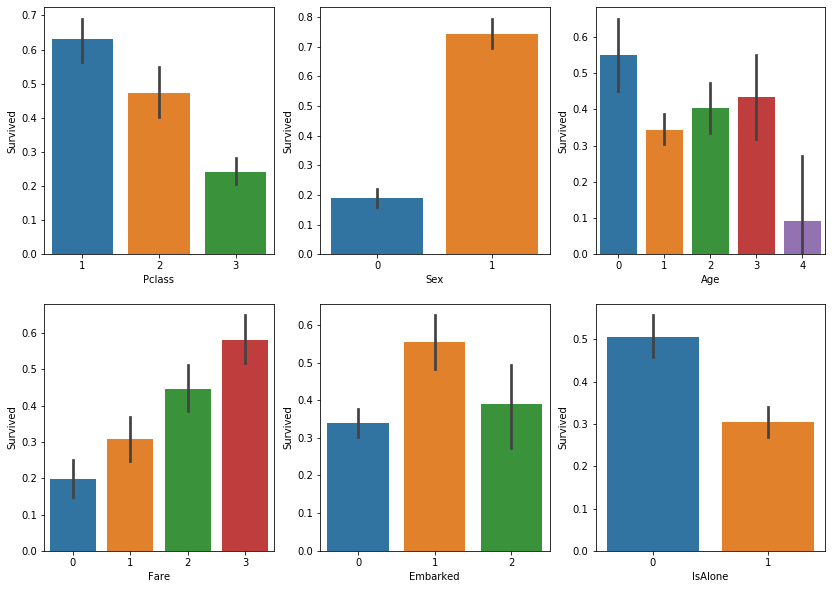

In [19]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(14,10))
list1=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','IsAlone'];list2=[0,0,0,1,1,1];list3=[0,1,2,0,1,2]
for (x,y,z) in zip(list1,list2,list3): 
    sns.barplot(x = x, y = 'Survived', data=train_df, ax = saxis[y,z])
    print(fig)

Above graph show that in each conditions, which type of passenger had higher survival rate.

# Model, predict and solve

The purpose of machine learning is to solve human problems.Machine learning can be categorized as: supervised learning, unsupervised learning, and reinforced learning. 

    Supervised learning is where you train the model by presenting it a training dataset that includes the correct answer. 

    Unsupervised learning is where you train the model using a training dataset that does not include the correct answer.
   

We are doing supervised machine learning, because we are training our algorithm by presenting it with a set of features and their corresponding target.There are many machine learning algorithms, however they can be reduced to four categories: classification, regression, clustering, or dimensionality reduction, depending on your target variable and data modeling goals.

We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We can generalize that a continuous target variable requires a regression algorithm and a discrete target variable requires a classification algorithm. So our problem is a classification and regression problem. We can narrow down our choice of models to a few. These include:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forest


In [20]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [21]:
# Logistic Regression
logreg = LogisticRegression()
Y_pred1 = logreg.fit(X_train, Y_train).predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# KNN
knn = KNeighborsClassifier(n_neighbors = 4)
Y_pred2 = knn.fit(X_train, Y_train).predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# Support Vector Machines
svm = SVC()
Y_pred3 = svm.fit(X_train, Y_train).predict(X_test)
acc_svm = round(svm.score(X_train, Y_train) * 100, 2)
# Naive Bayes classifier
nb = GaussianNB()
Y_pred4 = nb.fit(X_train, Y_train).predict(X_test)
acc_nb = round(nb.score(X_train, Y_train) * 100, 2)
# Decision Tree
decision_tree = DecisionTreeClassifier()
Y_pred5 = decision_tree.fit(X_train, Y_train).predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
# Random Forrest
random_forest = RandomForestClassifier(n_estimators=100)
Y_pred6 = random_forest.fit(X_train, Y_train).predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#--------------------------------------------------------------------------
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Support Vector Machines','Naive Bayes','Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_knn, acc_svm,  acc_nb,acc_decision_tree,acc_random_forest]})
models=models.sort_values(by='Score', ascending=False)
models

/Users/balloon_n/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/balloon_n/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Model,Score
4,Decision Tree,86.87
5,Random Forest,86.87
1,KNN,84.51
2,Support Vector Machines,83.39
0,Logistic Regression,80.70
3,Naive Bayes,77.33


Text(0, 0.5, 'Algorithm')

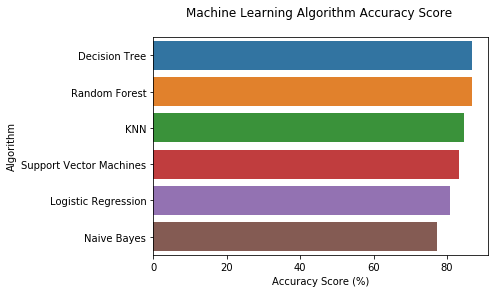

In [22]:
sns.barplot(x='Score', y = 'Model', data = models)
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_id,
        "Survived": Y_pred1
    })

submission.to_csv('Submission.csv', index=False)